## Bayes Formula

The prevalence of the disease is the proportion of the population who is sick and 
the accuracy of the test is the probability that the test gives a correct result

Based on these two parameters, we can define four major categories:
 - P(sick) = prevalence
 - P(healthy) = 1 - P(sick)
 - P(accurate) = accuracy
 - P(inaccurate) = 1 - P(accurate)


The test accuracy is the probability that a person tests positive if she/he is sick, and also the probability that a person tests negative if she/he is healthy. These conditional probabilities correspond to the accuracy of the test:
 - P(positive | sick) = accuracy
 - P(negative | healthy) = accuracy

Note - These are two different values and are called sensitivity (probability of getting a positive test when sick) and specificity (probability of getting a negative test when healthy)

Thus, the following:
 - P(positive) = P(accurate) * P(sick) + P(inaccurate) * P(healthy) = accuracy * prevalence + (1-accuracy) * (1-prevalence)
 - P(negative) = P(accurate) * P(healthy) + P(inaccurate) * P(sick) = accuracy * (1-prevalence) + (1-accuracy) * prevalence


Bayes Formula:

**P(A | B) = P(B | A) / P(B)**


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
prevalance = np.linspace(0.005, 0.02, 10)
accuracy = np.linspace(0.935, 0.99, 10)

In [42]:
def test_accuracy(accuracy, prevalance, graph):
    healthy = 1 - prevalance
    inaccurate = 1 - accuracy
    probs_positive = (accuracy * prevalance) + (inaccurate * healthy)
    probs_negative = (accuracy * healthy) + (inaccurate * prevalance)
    
    if graph == 'Yes':
        fig, ax = plt.subplots(1,2)
        sns.lineplot(x=accuracy, y=probs_negative, ax=ax[0])
        sns.lineplot(x=prevalance, y=probs_negative, ax=ax[1])
        plt.tight_layout()
    else:
        print("P(+) = ", round(probs_positive*100, 2))
        print("P(-) = ", round(probs_negative*100, 2))
        print(round(probs_positive + probs_negative), 2)

    return probs_positive, probs_negative

(array([0.06935   , 0.06477037, 0.06023148, 0.05573333, 0.05127593,
        0.04685926, 0.04248333, 0.03814815, 0.0338537 , 0.0296    ]),
 array([0.93065   , 0.93522963, 0.93976852, 0.94426667, 0.94872407,
        0.95314074, 0.95751667, 0.96185185, 0.9661463 , 0.9704    ]))

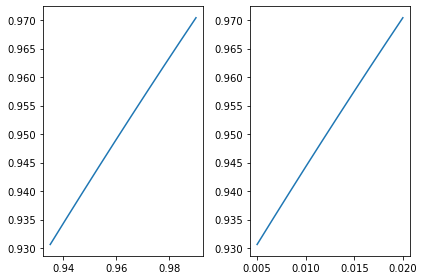

In [43]:
test_accuracy(accuracy, prevalance, 'Yes')

In [7]:
probs_positive, probs_negative = test_accuracy(0.98, 0.015, 'No')

P(+) =  3.4400000000000013
P(-) =  96.55999999999999
0.9999999999999999


In [40]:
# Interested in P(Sick | +) and P(Healthy | -)
def bayes1(accuracy, prevalance, prob_positive=None, prob_negative=None):
    
    # Posterior = P(+ | Sick) * P(Sick) / P(+)
    posterior1 = (accuracy * prevalance) / (probs_positive)
    # Posterior = P(- | Healthy) * P(Healthy) / P(-)
    posterior2 = (accuracy * 1-prevalance) / (probs_negative)
    
    print("P(Sick | +) = ", round(posterior1*100, 2), "%")
    print("P(Healthy | -) = ", round(posterior2*100, 2), "%")
    
    return posterior1, posterior2

In [41]:
prob_sick_given_positive, prob_healthy_given_negative = bayes1(0.98, 0.015, probs_positive, probs_negative)

P(Sick | +) =  42.73 %
P(Healthy | -) =  99.94 %


In [35]:
# Now, we are interested in P(+ | Healthy) and P(- | Sick)
def bayes2(accuracy, prevalance, prob_positive=None, prob_negative=None):

    # Posterior = P(Healthy | +) * P(+) / P(Healthy) 
    posterior1 = (1 - prob_sick_given_positive) * prob_positive / 1 - prevalance
    # Posterior = P(Sick | -) * P(-) / P(Sick)
    posterior2 = (1 - prob_healthy_given_negative) * prob_negative / prevalance
    
    print("P(+ | Healthy) = ", round(posterior1*100, 4), "%")
    print("P(- | Sick) = ", round(posterior2*100, 4), "%")

In [37]:
bayes2(0.98, 0.015, probs_positive, probs_negative)

P(+ | Healthy) =  0.47 %
P(- | Sick) =  4.0 %
